In [6]:
# %load /home/glebi/git/experiment-automation/processing_tools.py
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
import scienceplots

plt.style.use(['science', 'russian-font'])

matplotlib.rcParams.update({
    'figure.figsize': [6, 4],
    'savefig.facecolor': 'white',
    'figure.dpi': 150.0,
    'font.size': 12.0,
    'savefig.dpi': 250.0
})


Тводы = 24 +- 0.5 град

In [7]:
T0 = 24
k = 0.041 # мв/град.цельсия

In [8]:
df = pd.read_csv("data.csv", sep="\t")
cols = df.columns
U = df[cols[0]]
f = df[cols[1]]
f0 = 857 # кГц

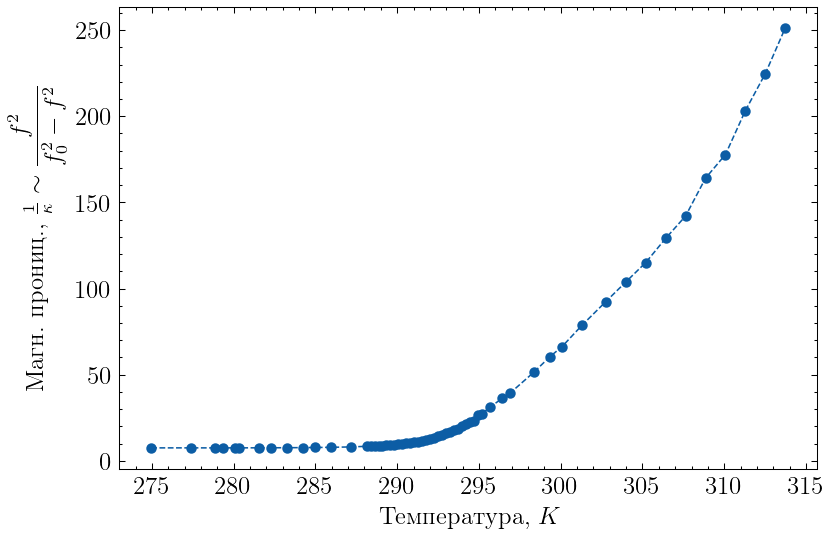

In [39]:
T = U/k + T0 + 273.15
kappaRev = f**2 / (f0**2 - f**2)

plt.plot(T, kappaRev, ".--", lw=.75, markersize=8)
plt.xlabel(fr"Температура, $K$")
plt.ylabel(r"Магн. прониц., $\frac 1 \kappa \sim \dfrac {f^2} {f_0^2 - f^2}$")

plt.savefig("plot1.svg")
plt.show()

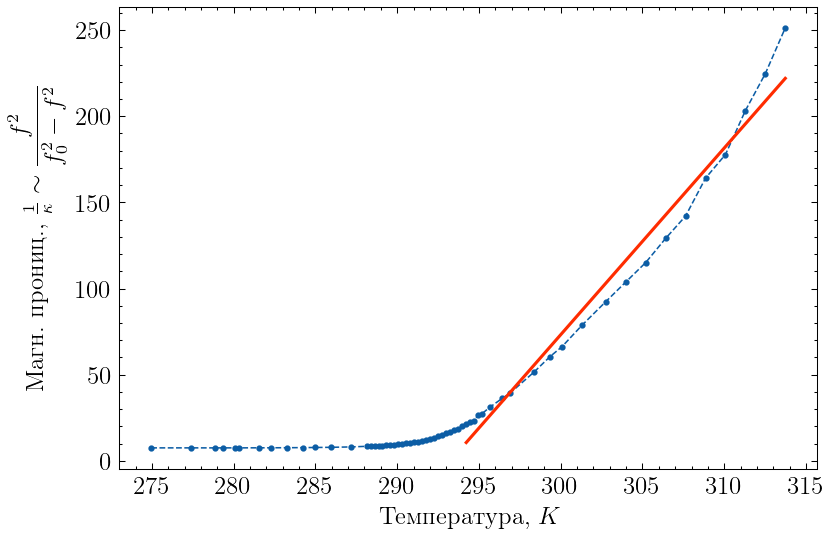

In [40]:
line = lambda x, k, b: k*x + b
si = 38
T_tail = T[si:]
kappaRev_tail = kappaRev[si:]
popt, pcov = curve_fit(line, T_tail, kappaRev_tail)

plt.plot(T, kappaRev, ".--", lw=.75, markersize=4)
plt.plot(T_tail, line(T_tail, *popt), lw=1.5, c="C3")
plt.plot()
plt.xlabel(fr"Температура, $K$")
plt.ylabel(r"Магн. прониц., $\frac 1 \kappa \sim \dfrac {f^2} {f_0^2 - f^2}$")

plt.savefig("plot2.svg")
plt.show()

In [41]:
popt, pcov

(array([   10.83492707, -3177.29142511]),
 array([[ 1.47017342e-01, -4.44001012e+01],
        [-4.44001012e+01,  1.34151101e+04]]))

In [42]:
Theta = -popt[1]/popt[0]
Theta

293.2452987878977

In [43]:
pcov[1][1]**.5

115.82361625604054